# Elecciones España (Clustering)

El conjunto de datos DatosEleccionesEspaña.xlsx contiene información demográfica
sobre los distintos municipios de España junto con los resultados que se obtuvieron
en un proceso electoral. En esta práctica, el objetivo fundamental es crear grupos de
comunidades autónomas en función de ciertas características previamente
seleccionadas.

In [1]:
!pip install -r requirements.txt

INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow==2.13.0 from https://files.pythonhosted.org/packages/ba/7c/b971f2485155917ecdcebb210e021e36a6b65457394590be01cc61515310/tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for pydantic_core==2.6.3 from https://files.pythonhosted.org/packages/63/af/869dd176247e855468249bcdb873103146c6b41d52b12a7c6ffc5d30462f/pydantic_core-2.6.3-cp310-none-win_amd64.whl.metadata
  Obtaining dependency information for pydantic==2.3.0 from https://files.pythonhosted.org/packages/82/06/fafdc75e48b248eff364b4249af4bcc6952225e8f20e8205820afc66e88e/pydantic-2.3.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/148.8 kB ? eta -:--:--
     -------------------------------------- 148.8/148.8 kB 4.3 MB/s eta 0:00:00
  Obtaining dependency information fo

ERROR: Cannot install -r requirements.txt (line 14), -r requirements.txt (line 45), -r requirements.txt (line 46), tensorflow-intel==2.13.0 and typing_extensions==4.7.1 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,10)

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

data = pd.read_csv('C:\\Users\\monic\\OneDrive\\DATASCIENCE - UCM\\07_MINERIADATOS_20230109\\DATOS\\DatosEleccionesEspaña.csv')
data.head()


,Name,CodigoProvincia,CCAA,Population,TotalCensus,AbstentionPtge,AbstencionAlta,Izda_Pct,Dcha_Pct,Otros_Pct,Izquierda,Derecha,Age_0-4_Ptge,Age_under19_Ptge,Age_19_65_pct,Age_over65_pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge,DifComAutonPtge,UnemployLess25_Ptge,Unemploy25_40_Ptge,UnemployMore40_Ptge,AgricultureUnemploymentPtge,IndustryUnemploymentPtge,ConstructionUnemploymentPtge,ServicesUnemploymentPtge,totalEmpresas,Industria,Construccion,ComercTTEHosteleria,Servicios,ActividadPpal,inmuebles,Pob2010,SUPERFICIE,Densidad,PobChange_pct,PersonasInmueble,Explotaciones
0,Abadía,10,Extremadura,336,282,20.213,0,60.444,35.555,1.778,1,0,3.869,18.155,55.059,26.785,44.048,0.89,79.762,0.298,19.345,2.381,54.762,42.857,4.762,9.524,11.905,73.810,15,0,0,0,0,Otro,216,326,4507.5593,MuyBaja,3.07,1.56,28
1,Abertura,10,Extremadura,429,364,25.275,0,54.779,44.118,0.368,1,0,1.632,13.055,56.643,30.304,50.117,1.63,90.909,2.797,7.226,16.216,32.432,51.351,8.108,8.108,10.811,67.568,11,0,0,0,0,Otro,382,459,6270.7646,MuyBaja,-6.54,1.12,67
2,Acebo,10,Extremadura,569,569,27.241,0,44.203,53.140,0.966,0,1,1.230,9.139,54.834,36.028,49.033,0.70,78.910,0.703,18.102,8.197,36.066,55.738,22.951,9.836,13.115,49.180,49,0,0,0,0,Otro,918,674,5702.1000,MuyBaja,-15.58,0.62,74
3,Acehúche,10,Extremadura,822,704,30.114,1,50.813,45.325,0.000,1,0,4.258,14.964,60.098,24.940,51.095,0.12,93.917,0.487,5.109,7.407,61.111,31.481,16.667,5.556,16.667,59.259,50,0,0,0,0,Otro,599,842,9106.4649,MuyBaja,-2.38,1.37,66
4,Aceituna,10,Extremadura,623,540,30.185,1,44.562,49.867,0.796,0,1,3.531,15.569,59.391,25.042,48.154,0.64,93.258,0.161,4.173,15.385,48.077,36.538,21.154,0.000,11.538,61.538,22,0,0,0,0,Otro,394,625,4007.6141,MuyBaja,-0.32,1.58,96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          8119 non-null   object 
 1   CodigoProvincia               8119 non-null   int64  
 2   CCAA                          8119 non-null   object 
 3   Population                    8119 non-null   int64  
 4   TotalCensus                   8119 non-null   int64  
 5   AbstentionPtge                8119 non-null   float64
 6   AbstencionAlta                8119 non-null   int64  
 7   Izda_Pct                      8119 non-null   float64
 8   Dcha_Pct                      8119 non-null   float64
 9   Otros_Pct                     8119 non-null   float64
 10  Izquierda                     8119 non-null   int64  
 11  Derecha                       8119 non-null   int64  
 12  Age_0-4_Ptge                  8119 non-null   float64
 13  Age

In [4]:
data.nunique()

Name                            8102
CodigoProvincia                   52
CCAA                              19
Population                      3597
TotalCensus                     3310
AbstentionPtge                  5675
AbstencionAlta                     2
Izda_Pct                        6349
Dcha_Pct                        6437
Otros_Pct                       4319
Izquierda                          2
Derecha                            2
Age_0-4_Ptge                    3761
Age_under19_Ptge                5891
Age_19_65_pct                   6215
Age_over65_pct                  6778
WomanPopulationPtge             4524
ForeignersPtge                  2329
SameComAutonPtge                6151
SameComAutonDiffProvPtge        4207
DifComAutonPtge                 5574
UnemployLess25_Ptge             2342
Unemploy25_40_Ptge              2681
UnemployMore40_Ptge             2751
AgricultureUnemploymentPtge     2525
IndustryUnemploymentPtge        2538
ConstructionUnemploymentPtge    2505
S

In [5]:
to_factor =list(data.loc[:,data.nunique()<=10]);
data[to_factor] = data[to_factor].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Name                          8119 non-null   object  
 1   CodigoProvincia               8119 non-null   int64   
 2   CCAA                          8119 non-null   object  
 3   Population                    8119 non-null   int64   
 4   TotalCensus                   8119 non-null   int64   
 5   AbstentionPtge                8119 non-null   float64 
 6   AbstencionAlta                8119 non-null   category
 7   Izda_Pct                      8119 non-null   float64 
 8   Dcha_Pct                      8119 non-null   float64 
 9   Otros_Pct                     8119 non-null   float64 
 10  Izquierda                     8119 non-null   category
 11  Derecha                       8119 non-null   category
 12  Age_0-4_Ptge                  8119 non-null   fl

In [6]:
#nos quedamos con aquellas columnas que sean de tipo número
elecciones = data.select_dtypes(include=[np.number])
elecciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CodigoProvincia               8119 non-null   int64  
 1   Population                    8119 non-null   int64  
 2   TotalCensus                   8119 non-null   int64  
 3   AbstentionPtge                8119 non-null   float64
 4   Izda_Pct                      8119 non-null   float64
 5   Dcha_Pct                      8119 non-null   float64
 6   Otros_Pct                     8119 non-null   float64
 7   Age_0-4_Ptge                  8119 non-null   float64
 8   Age_under19_Ptge              8119 non-null   float64
 9   Age_19_65_pct                 8119 non-null   float64
 10  Age_over65_pct                8119 non-null   float64
 11  WomanPopulationPtge           8119 non-null   float64
 12  ForeignersPtge                8119 non-null   float64
 13  Sam

In [7]:
#seleccionamos 10 variables y sacamos codigoprovincia y las edades porque tienen valores fuera de rango que luego se consieran
#missing. Por tanto, elegimos otras variables.
elecciones= elecciones.iloc[:, 0:15]
elecciones=elecciones.drop('CodigoProvincia',axis=1)
elecciones=elecciones.drop('Age_0-4_Ptge',axis=1)
elecciones=elecciones.drop('Age_under19_Ptge',axis=1)
elecciones=elecciones.drop('Age_19_65_pct',axis=1)
elecciones=elecciones.drop('Age_over65_pct',axis=1)
elecciones.head()

,Population,TotalCensus,AbstentionPtge,Izda_Pct,Dcha_Pct,Otros_Pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge
0,336,282,20.213,60.444,35.555,1.778,44.048,0.89,79.762,0.298
1,429,364,25.275,54.779,44.118,0.368,50.117,1.63,90.909,2.797
2,569,569,27.241,44.203,53.140,0.966,49.033,0.70,78.910,0.703
3,822,704,30.114,50.813,45.325,0.000,51.095,0.12,93.917,0.487
4,623,540,30.185,44.562,49.867,0.796,48.154,0.64,93.258,0.161


In [318]:
elecciones.describe()

,Population,TotalCensus,AbstentionPtge,Izda_Pct,Dcha_Pct,Otros_Pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge
count,8.119000e+03,8.119000e+03,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000
mean,5.741855e+03,4.260666e+03,26.506951,34.403789,48.915409,14.666183,47.302755,5.619553,81.629141,4.336688
std,4.621520e+04,3.442889e+04,7.540091,16.482285,19.945087,25.093642,4.361907,7.348553,12.289063,6.394440
min,5.000000e+00,5.000000e+00,0.000000,0.000000,0.000000,0.000000,11.765000,-8.960000,0.000000,0.000000
25%,1.660000e+02,1.400000e+02,21.678000,21.892500,38.690500,0.759500,45.725000,1.060000,75.806000,0.676000
50%,5.490000e+02,4.470000e+02,26.429000,35.165000,51.582000,1.883000,48.485000,3.590000,84.493000,2.190000
75%,2.427500e+03,1.846500e+03,31.475000,46.032000,62.201000,16.497000,50.000000,8.180000,90.462000,5.277000
max,3.141991e+06,2.363829e+06,57.576000,94.117000,100.000000,100.000000,72.683000,71.470000,127.156000,67.308000


En principio no hay ningún valor missing porque en todos los registros count = 8119. No obstante, se observan valores fuera de rango en los 3 últimos registros pues los porcentajes deben toamr valores de entre 0 y 100.

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(9,8), bins = None):
    # Definir tamaño letra
    sns.set(font_scale=font_scale)
    # Crear ventana para los subgráficos
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Crear boxplot
    sns.boxplot(x=data, ax=ax_box2)
    # Crear histograma
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    # Mostrar gráfico
    plt.show()

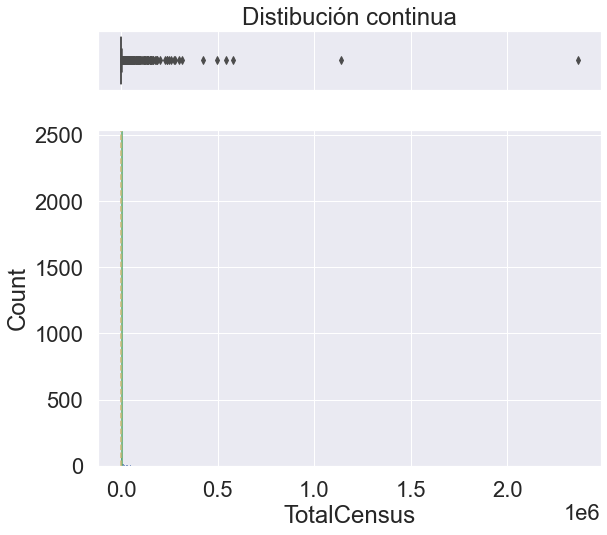

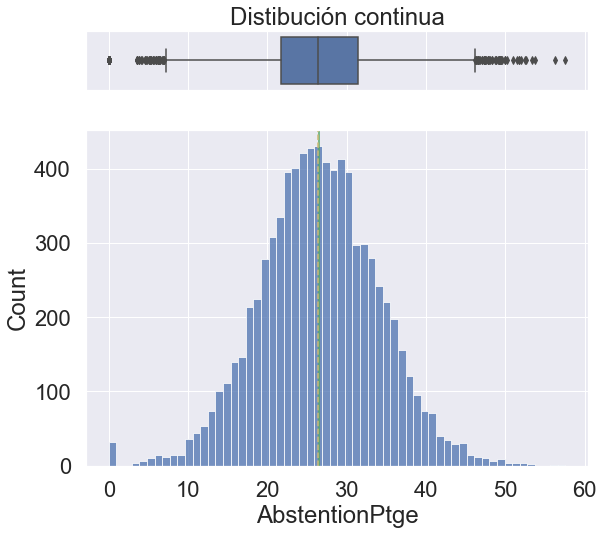

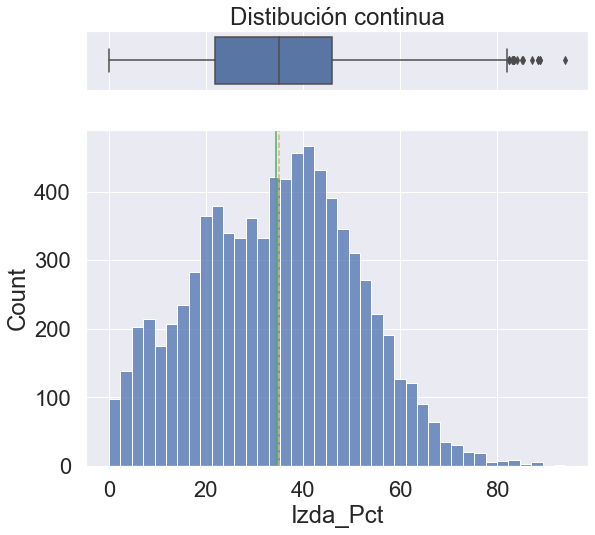

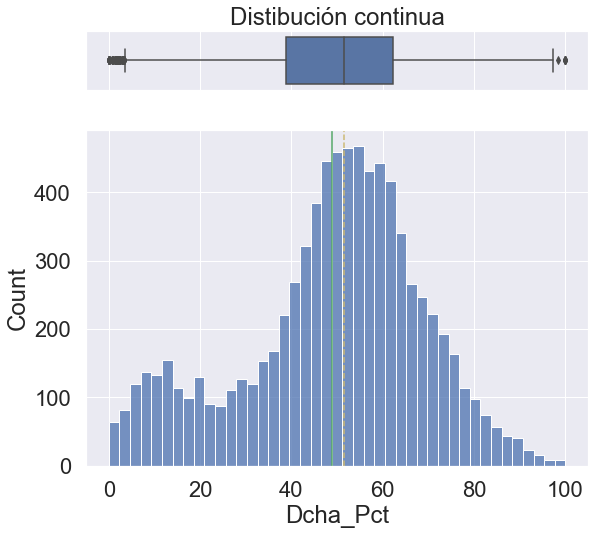

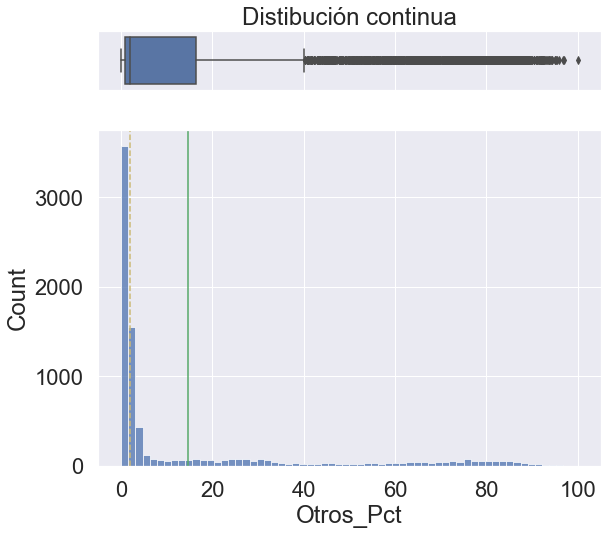

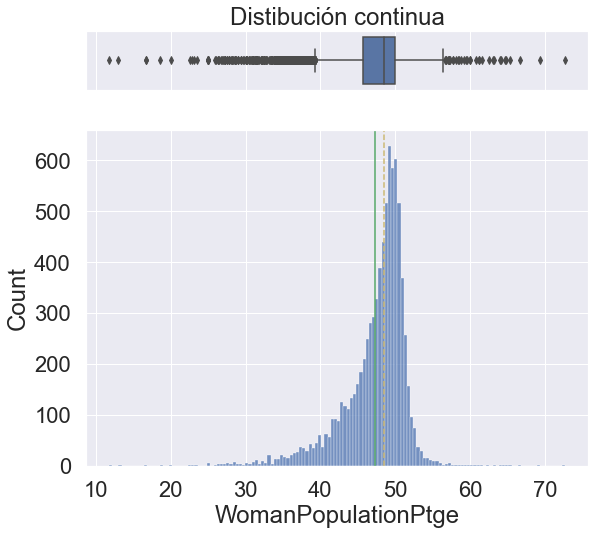

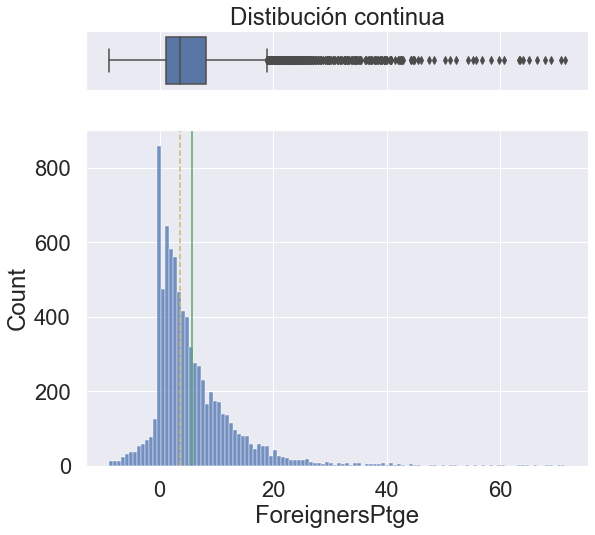

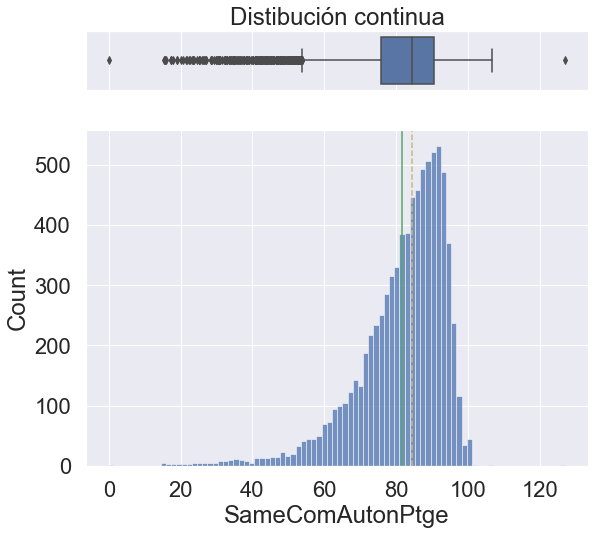

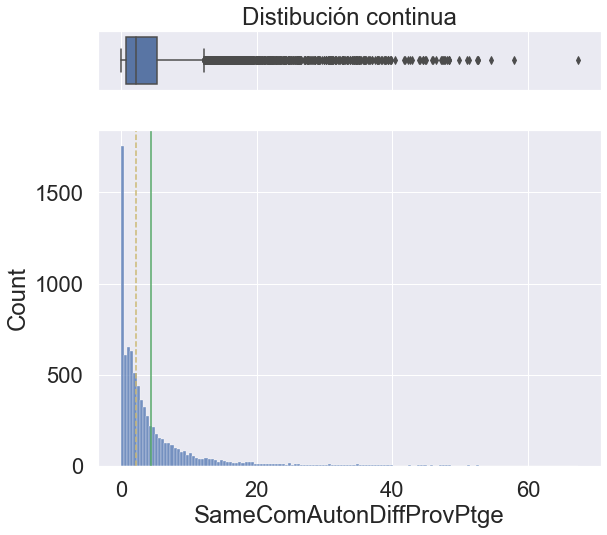

TotalCensus                 None
AbstentionPtge              None
Izda_Pct                    None
Dcha_Pct                    None
Otros_Pct                   None
WomanPopulationPtge         None
ForeignersPtge              None
SameComAutonPtge            None
SameComAutonDiffProvPtge    None
dtype: object

In [320]:
def plot(col):
       histogram_boxplot(col, xlabel = col.name, title = 'Distibución continua')
elecciones.iloc[:,1:10].apply(plot)


Veamos si existen valores atípicos. Para ello hacemos asimetría.

In [321]:
elecciones.select_dtypes(include=np.number).apply(lambda x: x.skew())


Population                  45.996406
TotalCensus                 46.510817
AbstentionPtge              -0.049941
Izda_Pct                     0.059920
Dcha_Pct                    -0.468014
Otros_Pct                    1.801732
WomanPopulationPtge         -1.671491
ForeignersPtge               2.497559
SameComAutonPtge            -1.521517
SameComAutonDiffProvPtge     3.287183
dtype: float64

Podemos observar como `Population` y `TotalCensus` son valores muy asimétricos, así mismo `Otros_Pct` y `WomanPopulationPtg`e también lo son según coeficiente de Asimetría de Fisher. Aplicamos método Winsor para colapsar los valores.

In [8]:
def winsorize_with_pandas(s, limits):
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))


In [9]:

def gestiona_outliers(col,clas = 'check'):
    
     print(col.name)
   
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3 
     else:
        criterio1 = abs((col-col.median())/col.mad())>8
     
          
     q1 = col.quantile(0.25)  
    
     q3 = col.quantile(0.75)
   
     IQR=q3-q1
     
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR)) # | significa "o"
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count() #contamos lower y calculamos proporción s/válidos, cumplen criterio 1y2 y además col por debajo de q1
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
       
     if clas == 'check': 
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper))) 
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum())) 
            col.loc[criterio1&criterio2] = np.nan 
            print('MissingDespues: ' + str(col.isna().sum()) +'\n') 
            return(col) 

          

elecciones.select_dtypes(include=np.number).copy().apply(lambda x: gestiona_outliers(x))

Population
TotalCensus
AbstentionPtge
Izda_Pct
Dcha_Pct
Otros_Pct
WomanPopulationPtge
ForeignersPtge
SameComAutonPtge
SameComAutonDiffProvPtge


,Population,TotalCensus,AbstentionPtge,Izda_Pct,Dcha_Pct,Otros_Pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.123168,0.000000,0.012317,0.000000
1,1.391797,1.243996,0.0,0.0,0.0,0.0,0.000000,0.320236,0.000000,0.886809
2,1.391797,1.243996,0.0,0.0,0.0,0.0,0.123168,0.320236,0.012317,0.886809


Se trata de identificar outliers lo cual necesariamente han de ser pocos. Si son el 20% o más de los registros, probablemente sean dos poblaciones diferentes y habría que tratarlo de diferente forma. En este caso vemos en la fila 0 los lower, fila 1 los upper y en la 2 los totales. Se puede observar como están por debajo del 2% por lo que se trata simplemente de valores atípicos.

In [324]:
elecciones.describe()

,Population,TotalCensus,AbstentionPtge,Izda_Pct,Dcha_Pct,Otros_Pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge
count,8.119000e+03,8.119000e+03,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000
mean,5.741855e+03,4.260666e+03,26.506951,34.403789,48.915409,14.666183,47.302755,5.619553,81.629141,4.336688
std,4.621520e+04,3.442889e+04,7.540091,16.482285,19.945087,25.093642,4.361907,7.348553,12.289063,6.394440
min,5.000000e+00,5.000000e+00,0.000000,0.000000,0.000000,0.000000,11.765000,-8.960000,0.000000,0.000000
25%,1.660000e+02,1.400000e+02,21.678000,21.892500,38.690500,0.759500,45.725000,1.060000,75.806000,0.676000
50%,5.490000e+02,4.470000e+02,26.429000,35.165000,51.582000,1.883000,48.485000,3.590000,84.493000,2.190000
75%,2.427500e+03,1.846500e+03,31.475000,46.032000,62.201000,16.497000,50.000000,8.180000,90.462000,5.277000
max,3.141991e+06,2.363829e+06,57.576000,94.117000,100.000000,100.000000,72.683000,71.470000,127.156000,67.308000


Observando el máximo que nos brinda el describe() observamos como hay valores situados fuera de rango, concretamente los 3 ultimos registros. Todo valor fuera de rango habrá que tomarlo como valor perdido pues no podemos asignar claramente a otros valores. 

In [10]:
elecciones.loc[~elecciones.ForeignersPtge.between(0,100), "ForeignersPtge"] = np.nan
elecciones.loc[~elecciones.SameComAutonPtge.between(0,100), "SameComAutonPtge"] = np.nan
elecciones.loc[~elecciones.SameComAutonDiffProvPtge.between(0,100), "SameComAutonDiffProvPtge"] = np.nan

In [326]:
elecciones.describe()

,Population,TotalCensus,AbstentionPtge,Izda_Pct,Dcha_Pct,Otros_Pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge
count,8.119000e+03,8.119000e+03,8119.000000,8119.000000,8119.000000,8119.000000,8119.000000,7466.000000,8116.000000,8119.000000
mean,5.741855e+03,4.260666e+03,26.506951,34.403789,48.915409,14.666183,47.302755,6.344069,81.617870,4.336688
std,4.621520e+04,3.442889e+04,7.540091,16.482285,19.945087,25.093642,4.361907,7.194724,12.275589,6.394440
min,5.000000e+00,5.000000e+00,0.000000,0.000000,0.000000,0.000000,11.765000,0.000000,0.000000,0.000000
25%,1.660000e+02,1.400000e+02,21.678000,21.892500,38.690500,0.759500,45.725000,1.620000,75.803000,0.676000
50%,5.490000e+02,4.470000e+02,26.429000,35.165000,51.582000,1.883000,48.485000,4.130000,84.491000,2.190000
75%,2.427500e+03,1.846500e+03,31.475000,46.032000,62.201000,16.497000,50.000000,8.810000,90.459000,5.277000
max,3.141991e+06,2.363829e+06,57.576000,94.117000,100.000000,100.000000,72.683000,71.470000,100.000000,67.308000


Estos valores se convierten en NaN pero ya tenemos los rangos ajustados de los 3 últimos 0-100 por ser un porcentaje.

Agregaremos los valores por CCAA distinguiendo entre valores relativos (agregación por la media) y valores absolutos (agregación por suma).

In [11]:
#Concatenamos nuestra variable objetivo con el resto de datos numéricos.
dataCCAA = pd.concat((data.CCAA, elecciones),axis=1)

In [12]:
#utilizamos la funcion groupby() para agrupar todas las filas por el campo CCAA y hacemos la media mean() y lo guardamos en un DF
CCAAmean = dataCCAA.groupby('CCAA').mean()
CCAAmean

,Population,TotalCensus,AbstentionPtge,Izda_Pct,Dcha_Pct,Otros_Pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge
CCAA,,,,,,,,,,
Andalucía,10858.494179,8124.034929,28.702028,55.177999,41.409270,1.355818,49.366288,6.268234,87.369347,4.822617
Aragón,1802.800274,1346.496580,25.033557,41.598175,54.711115,1.783967,45.753094,7.410950,79.417042,4.933471
Asturias,13477.294872,11181.153846,33.762987,49.701974,46.295385,1.860462,49.841897,2.600959,86.720308,0.000000
Baleares,16484.761194,11180.074627,33.574701,44.388761,48.681119,4.588448,49.460373,16.095000,64.388284,0.000000
Canarias,23867.113636,17449.875000,34.843398,39.926080,45.635125,12.472602,49.451693,11.479125,76.895852,1.359284
Cantabria,5737.049020,4536.245098,26.880235,38.197441,58.299588,1.602990,47.716373,3.330575,81.739010,0.000000
CastillaLeón,1099.667260,885.501335,23.822925,31.514937,64.860948,1.457867,45.622654,3.829932,86.501724,4.338598
CastillaMancha,2240.686616,1675.803047,22.698995,42.159800,54.733021,1.301682,46.331884,7.221686,73.252835,2.051165
Cataluña,7928.306230,5610.942978,34.286721,9.709147,15.489498,72.753068,48.409210,9.184219,78.891256,11.746153


In [13]:
#utilizamos la funcion groupby() para agrupar todas las filas por el campo CCAA y hacemos la suma sum() y lo guardamos en un DF
CCAAsum = dataCCAA.groupby('CCAA').sum()
CCAAsum

,Population,TotalCensus,AbstentionPtge,Izda_Pct,Dcha_Pct,Otros_Pct,WomanPopulationPtge,ForeignersPtge,SameComAutonPtge,SameComAutonDiffProvPtge
CCAA,,,,,,,,,,
Andalucía,8393616,6279879,22186.668,42652.593,32009.366,1048.047,38160.141,4544.47,67274.397,3727.883
Aragón,1317847,984289,18299.530,30408.266,39993.825,1304.080,33445.512,4994.98,58053.858,3606.367
Asturias,1051229,872130,2633.513,3876.754,3611.040,145.116,3887.668,189.87,6764.184,0.000
Baleares,1104479,749065,2249.505,2974.047,3261.635,307.426,3313.845,965.70,4314.015,0.000
Canarias,2100306,1535589,3066.219,3513.495,4015.891,1097.589,4351.749,918.33,6766.835,119.617
Cantabria,585179,462697,2741.784,3896.139,5946.558,163.505,4867.070,289.76,8337.379,0.000
CastillaLeón,2472052,1990607,53553.936,70845.579,145807.411,3277.286,102559.726,7897.32,194455.876,9753.168
CastillaMancha,2059191,1540063,20860.376,38744.856,50299.646,1196.246,42579.001,6080.66,67319.355,1885.021
Cataluña,7508106,5313563,32469.525,9194.562,14668.555,68897.155,45843.522,8118.85,74710.019,11123.607


En primer luegar, antes de la aplicación de métodos de clustering escalaremos los datos ya que distintas medidas afectan a la evaluación de distancias en el espacio. En este dataframe observamos unidades muy diferentes por lo que vamos a proceder con el escalado.

In [14]:
#escalamos datos porque unidades de medida diferentes
from sklearn.preprocessing import StandardScaler
CCAAmeanesc = StandardScaler()
CCAAmeanesc.fit(CCAAmean)
X = CCAAmeanesc.transform(CCAAmean) 
CCAAesc=pd.DataFrame(X) #convertimos en dataframe
CCAAesc

,0,1,2,3,4,5,6,7,8,9
0,-0.317447,-0.303412,-0.189308,1.750486,-0.508933,-0.552883,0.661649,-0.345141,1.190994,0.853301
1,-0.683501,-0.717569,-0.675797,0.449270,0.408073,-0.531264,-1.404916,-0.077962,0.197635,0.891082
2,-0.211589,-0.116600,0.481845,1.225774,-0.172093,-0.527402,0.933673,-1.202590,1.109919,-0.790320
3,-0.090019,-0.116666,0.456875,0.716663,-0.007624,-0.389661,0.715460,1.952463,-1.679676,-0.790320
4,0.208394,0.266464,0.625122,0.289050,-0.217610,0.008426,0.710496,0.873221,-0.117299,-0.327055
5,-0.524469,-0.522652,-0.430902,0.123412,0.655456,-0.540402,-0.282020,-1.031997,0.487682,-0.790320
6,-0.711924,-0.745739,-0.836343,-0.516904,1.107785,-0.547730,-1.479521,-0.915242,1.082615,0.688340
7,-0.665801,-0.697446,-0.985392,0.503085,0.409583,-0.555616,-1.073878,-0.122214,-0.572365,-0.091251
8,-0.435893,-0.456980,0.551299,-2.606330,-2.295797,3.052108,0.114248,0.336648,0.131956,3.212948
9,2.649748,2.813115,2.291758,-0.372018,0.959433,-0.515156,0.599713,-0.382138,-1.196792,-0.582082


In [15]:
#Cambiamos nombres de las columnas
CCAAesc.columns = ['Population', 'TotalCensus', 'AbstentionPtge', 'Izda_Pct', 'Dcha_Pct', 'Otros_Pct','WomanPopulationPtge','ForeignersPtge','SameComAutonPtge','SameComAutonDiffProvPtge']

In [16]:
#Cambiamos nombres de las filas por CCAA
CCAAesc.rename(index={0:'Andalucía',1:'Aragón',2:'Asturias',3:'Baleares',4:'Canarias',5:'Cantabria',6:'CastillaLeón',7:'CastillaMancha',8:'Cataluña',9:'Ceuta',10:'ComValenciana',11:'Extremadura',12:'Galicia',13:'Madrid',14:'Melilla',15:'Murcia',16:'Navarra',17:'PaísVasco',18:'Rioja'}, inplace=True)

La distancia a aplicar sería la distancia Euclidea porque se adapta bien a los datos numéricos y es la medida de distancia más simple.

### Métodos de clustering y Linkage

Los métodos de clustering jerárquico servirán para hacerse una idea de la dinámica de agrupación de los datos y proponer, en base al dendograma, un número de grupos tentativos que presenten características comunes. No es necesario, por tanto, pre-especificar el número de clusters. Para qie este proceso de agrupación se pueda llevar a cabo, tenemos como se cuantifica la similitud entre clusters. A este proceso se la conoce como linkage. Existen varios tipos de linkage y en este caso vamos a representar todos y elegir 1:


- Ward: método mínima varianza, cuyo objetivo es minimizar la suma total de la varianza intra-cluster.
- Average: se calcula la distancia de todos los clusters y el valor promedio de todas ellas se selecciona como distancia entre clusters.
- Complete: computa todas las distrancias entre las observaciones de 1 y B y calcula la mayor de ellas com distancia.
- Single: calcula todas y coge la distancia más cercana.



Vamos a definir una función que facilite la creación del dendograma dado el modelo jerárquico que se desee visualizar.

In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from time import time


def plot_dendogram(model, **kwargs):
  
  '''
  Esta función extrae la información de un modelo AgglomerativeClustering
  y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
  '''
      
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count
  
  linkage_matrix = np.column_stack([model.children_, model.distances_,
                                        counts]).astype(float)
  
  # Plot
  dendrogram(linkage_matrix, **kwargs)
  plt.show()
    

Aplicamos el dendograma para los 4 métodos de Linkage principales para comparar la dinámica de agrupación propuesta por cada uno de ellos. El dendograma es un gráfico como un árbol. Las hojas del árbol corresponden a los registros y la longitud de la rama del árbol indica el grado de disimilitud entre los grupos correspondientes. A diferencia de k-means no es necesario especificar previamente el número de grupos.

ward :	0.02s


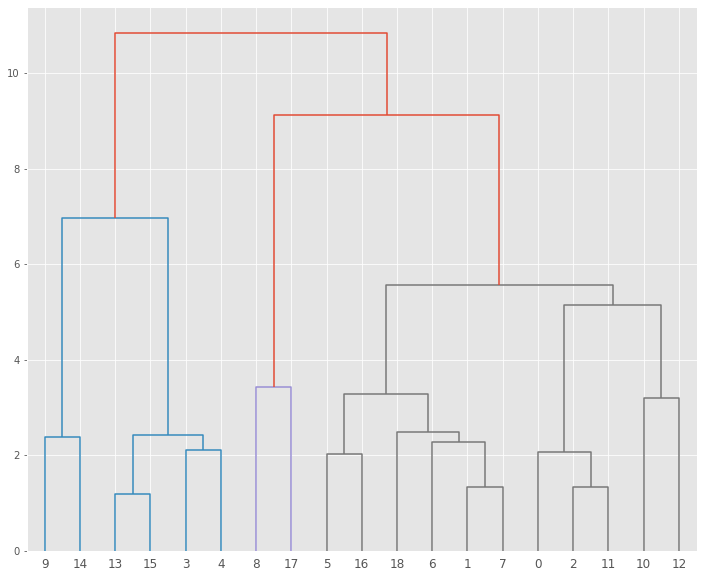

average :	0.00s


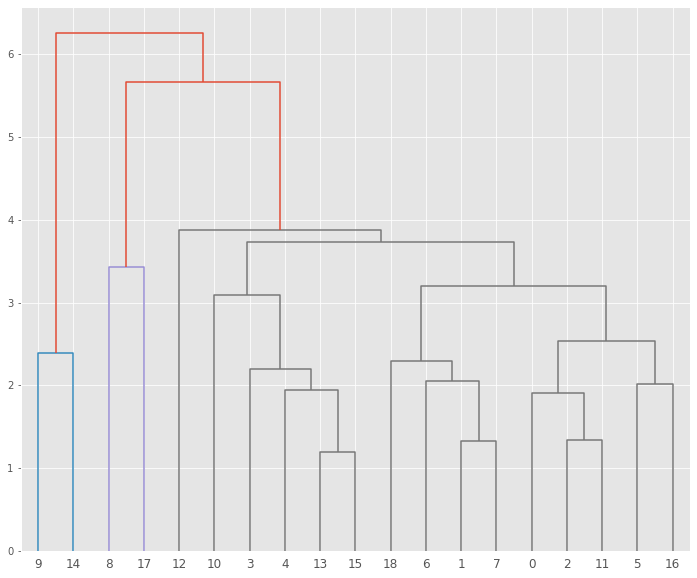

complete :	0.00s


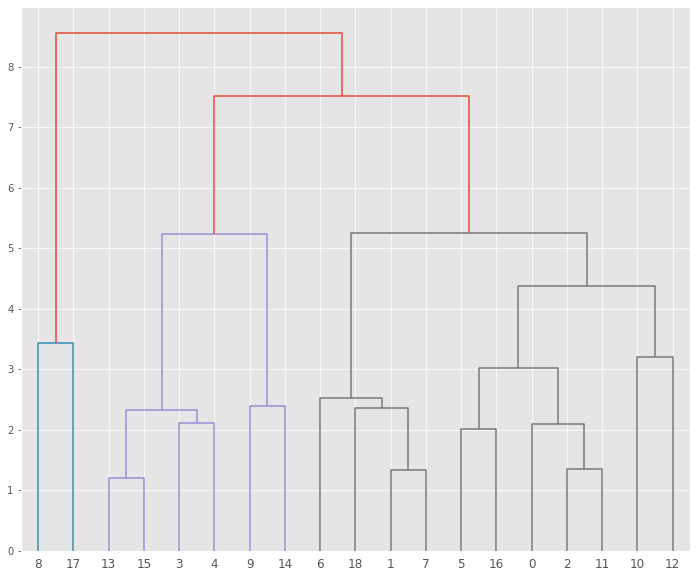

single :	0.01s


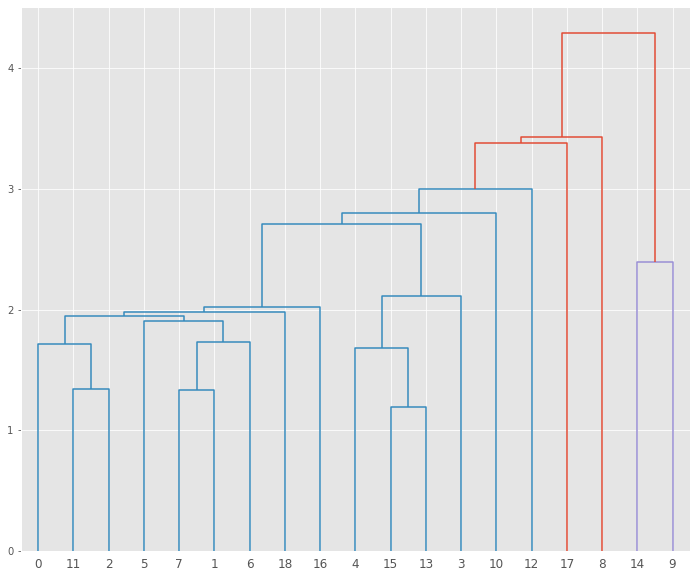

In [18]:
for linkage in ("ward", "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=None,
                            distance_threshold = 0)
    t0 = time()
    clustering.fit(CCAAesc)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    
    plt.clf()
    plot_dendogram(clustering)
    #plot_clustering(X_scaled, clustering.labels_, "%s linkage" % linkage)


plt.show()

Todos los métodos nos dan 4 grupos excepto el último que nos da 3. No obstante, decidimos quedarnos con el método de mínima varianza de Ward ya que las alturas de corte parecen discriminar algo mejor a los grupos. 

Ajustamos un clustering jerárquico por el Linkage de Ward y 4 grupos. Extraeremos la clasificación propuesta en forma de vector de clase predicha y calcularemos dos métricas de evaluación en ambiente no supervisado:

- Silueta. El coeficiente de silueta se define para cada registro como  𝑏−𝑎𝑚𝑎𝑥(𝑎,𝑏)
  siendo a la distancia a su centroide y b la distancia al centroide del grupo más cercano y al que no pertenece dicho registro según la agrupación propuesta. Nos informa para cada registro de lo "bien" clasificado que se encuentra en su grupo actual o si tal vez estaría mejor perteneciendo al grupo más cercano. La función silhouette_score devuelve el promedio para todas las observaciones del archivo. Siempre se puede querer consultar los coeficientes para cada observación, lo haríamos con silhouette_samples.

- Indice de Calinski-Harabasz. El criterio de la varianza de toda la vida. Compara la varianza entre grupos bss con la varianza intra wss a través de un cociente. Cuanto mayor sea el índice, mejor se considera el clustering. 

In [19]:
modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            n_clusters  = 4
                     )
modelo_hclust_ward.fit(X=CCAAesc)

cluster_labels = modelo_hclust_ward.fit_predict(CCAAesc)


In [20]:
cluster_labels

array([0, 0, 0, 1, 1, 0, 0, 0, 2, 3, 0, 0, 0, 1, 3, 1, 0, 2, 0],
      dtype=int64)

*Silueta clustering Ward*

In [21]:
silhouette_score(CCAAesc, cluster_labels)


0.2900357390410709

*Indice de Calinski-Harabasz clustering Ward*

In [22]:
from sklearn import metrics
metrics.calinski_harabasz_score(CCAAesc, cluster_labels)


9.522368569954416

Se puede observar una Silueta bastante regular porque está muy por debajo de 0,5 por lo que no es del todo buena. En cuanto al Indice de Calinski no podemos afirmar nada porque sirve para comparar dos modelos pero a priori parece una cifra pequeña.

Aplicamos para seleccionar los componetnes principales y ver que porcentaje de la varianza capturan.

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


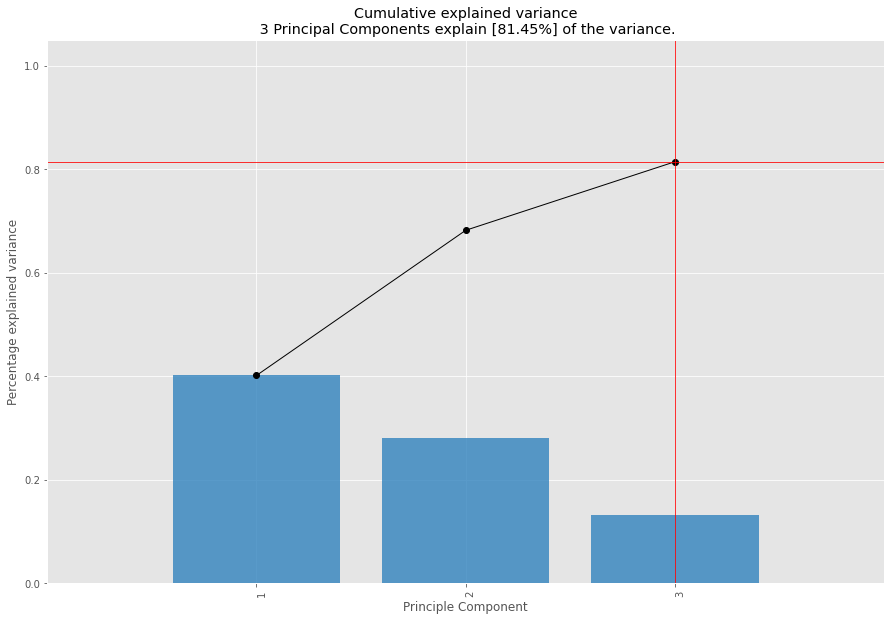

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 3 Principal Components explain [81.45%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 864x720 with 0 Axes>

In [39]:
from sklearn import decomposition as dc
# Load library
from pca import pca

pcaModel = pca(normalize=True,n_components=3) # elegimos 3 componentes
results = pcaModel.fit_transform(CCAAesc)

pcaModel.plot()

Se busca un equilibrio entre reducir la dimensionalidad del conjunto de datos y retener la mayor cantidad posible de información. Un porcentaje del 81.45% sugiere que las tres primeras componentes principales están capturando una proporción significativa de la variabilidad presente en los datos originales.

In [40]:
#Acceso a las cargas
PCAclust = pd.DataFrame(pcaModel.results['PC'])
PCAclust

,PC1,PC2,PC3
Andalucía,-0.941794,-0.615124,1.555342
Aragón,-1.228247,-1.044220,-0.952444
Asturias,-0.259449,-0.983908,2.249509
Baleares,1.749670,-0.128626,-0.828629
Canarias,0.912316,0.390499,0.322893
Cantabria,-0.689945,-1.441977,0.372566
CastillaLeón,-1.749074,-1.268669,-0.654973
CastillaMancha,-0.702274,-1.416667,-1.084032
Cataluña,-2.361646,5.064070,-0.953054
Ceuta,4.273890,0.852834,1.059451


Veamos como sería el biplot si elegimos solamente 2 componentes que explican el 68,20% de la variabilidad de la varianza.

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [19] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [19] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'2 Principal Components explain [68.20%] of the variance'}, xlabel='PC1 (40.1% expl.var)', ylabel='PC2 (28.0% expl.var)'>)

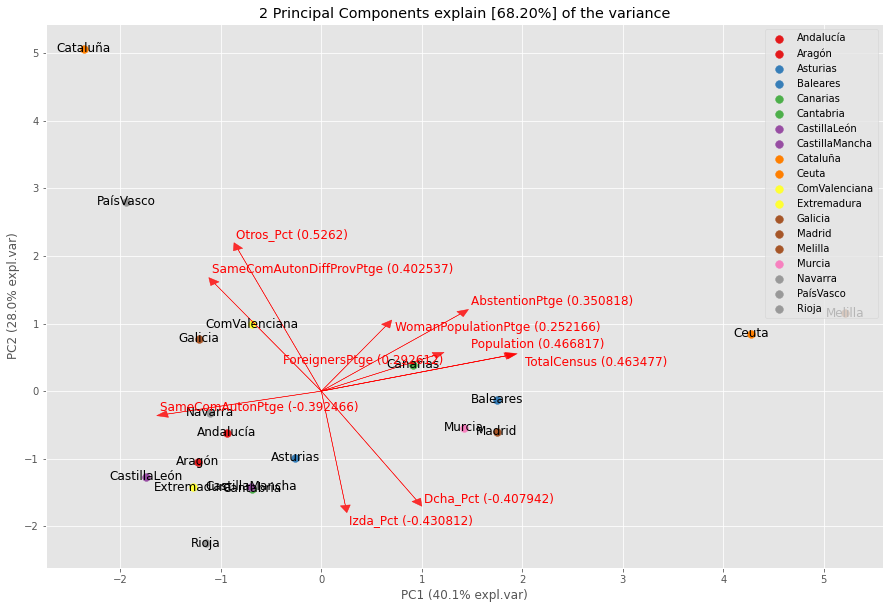

In [42]:
pcaModel2 = pca(normalize=True,n_components=2) # elegimos 3 componentes
results = pcaModel2.fit_transform(CCAAesc)
pcaModel2.biplot(legend=True)

Este biplot muestra las observaciones en el espacio de las primeras dos componentes principales y las direcciones de las variables originales en la misma gráfica. Esto te permitirá visualizar tanto la relación entre las observaciones como la contribución de cada variable a las componentes principales.

Con dos componentes retenemos el 68.20% de la variabilidad del archivo. Se observa que la componente 1 está asociada a `AbstentionPtge`, mientras que la componente 2 se asocia de forma positiva a `Population` y `TotalCensus`.

Así, los países del segundo cuadrante, con valores positivos en la componente 2, se caracterizan por alta población y alto censo. Mientras que los países que se hallan en el cuadrante 3 registran menor población y censo pero más abstención.

No obstante, tendremos en cuenta 3 PCA ya que explican prácticamente el 90% de la variabilidad de la varianza y evaluaremos las regiones donde se sitúan los clusters creados.

In [44]:
from numpy import random
import pandas as pd
cluster_labelsdf = pd.DataFrame(cluster_labels)
cluster_labelsdf.rename(index={0:'Andalucía',1:'Aragón',2:'Asturias',3:'Baleares',4:'Canarias',5:'Cantabria',6:'CastillaLeón',7:'CastillaMancha',8:'Cataluña',9:'Ceuta',10:'ComValenciana',11:'Extremadura',12:'Galicia',13:'Madrid',14:'Melilla',15:'Murcia',16:'Navarra',17:'PaísVasco',18:'Rioja'}, inplace=True)

In [45]:
# Acceso a scores
pcaModel.results['PC']

,PC1,PC2,PC3
Andalucía,-0.941794,-0.615124,1.555342
Aragón,-1.228247,-1.044220,-0.952444
Asturias,-0.259449,-0.983908,2.249509
Baleares,1.749670,-0.128626,-0.828629
Canarias,0.912316,0.390499,0.322893
Cantabria,-0.689945,-1.441977,0.372566
CastillaLeón,-1.749074,-1.268669,-0.654973
CastillaMancha,-0.702274,-1.416667,-1.084032
Cataluña,-2.361646,5.064070,-0.953054
Ceuta,4.273890,0.852834,1.059451


In [46]:
# Unimos variable de cluster_kmeans previamente creada
CCAA_pca = pcaModel.results['PC'].join(cluster_labelsdf[0])
CCAA_pca

,PC1,PC2,PC3,0
Andalucía,-0.941794,-0.615124,1.555342,0
Aragón,-1.228247,-1.044220,-0.952444,0
Asturias,-0.259449,-0.983908,2.249509,0
Baleares,1.749670,-0.128626,-0.828629,1
Canarias,0.912316,0.390499,0.322893,1
Cantabria,-0.689945,-1.441977,0.372566,0
CastillaLeón,-1.749074,-1.268669,-0.654973,0
CastillaMancha,-0.702274,-1.416667,-1.084032,0
Cataluña,-2.361646,5.064070,-0.953054,2
Ceuta,4.273890,0.852834,1.059451,3


In [47]:
#cambiamos de nombre a la columna del cluster_labels para poder representarlo.
CCAA_pca = CCAA_pca.set_axis(['PC1', 'PC2', 'PC3','cluster_labels'], axis=1)
CCAA_pca

,PC1,PC2,PC3,cluster_labels
Andalucía,-0.941794,-0.615124,1.555342,0
Aragón,-1.228247,-1.044220,-0.952444,0
Asturias,-0.259449,-0.983908,2.249509,0
Baleares,1.749670,-0.128626,-0.828629,1
Canarias,0.912316,0.390499,0.322893,1
Cantabria,-0.689945,-1.441977,0.372566,0
CastillaLeón,-1.749074,-1.268669,-0.654973,0
CastillaMancha,-0.702274,-1.416667,-1.084032,0
Cataluña,-2.361646,5.064070,-0.953054,2
Ceuta,4.273890,0.852834,1.059451,3


In [49]:
import plotly.express as px

fig = px.scatter_3d(CCAA_pca, x='PC1', y='PC2', z='PC3', color='cluster_labels', text=CCAA_pca.index)
fig.show()


Podemos observar los cuatro grupos que se han formado:

     - GRUPO 0: lo forman las CCAA de Asturias, Galicia, Extremadura, Andalucía, Cantabria, Comunidad Valenciana, Castilla La Mancha y Castilla León, Navarra, Aragón y La Rioja. Estas presentan un PC1 negativo.
    
    - GRUPO 1: formado por las islas tanto Canarias como Baleares y se le suman Madrid y Murcia. En todos los PC se registra una cifra cercana a 0, siendo PC1 el más elevado.
        
    - GRUPO 2: formado por las CCAA de País Vasco y Cataluña. PC1 negativo, PC2 elevado y PC3 cercano a 0.
        
    - GRUPO 3: lo forman las ciudades autónomas Ceuta y Melilla que presentan un PC1 muy elevado y un PC2 cercano a 0.

Haremos el cálculo de centroides que es una técnica ensencial de agrupamiento para crear representaciones compactas de grupos de datos, facilitar la asignación de nuevos datos a clústeres existentes y proporcionar una comprensión más clara de la estructura del conjunto de datos.

In [50]:
from sklearn.neighbors import NearestCentroid
# Crear un clasificador de centroides
clf = NearestCentroid()
# Ajustar el clasificador utilizando los datos de las componentes principales y las etiquetas del clúster
clf.fit(CCAA_pca, cluster_labels)
print(clf.centroids_)


[[-1.00058542 -0.81778217  0.13180777  0.        ]
 [ 1.45612398 -0.21924604 -0.45794813  1.        ]
 [-2.15082089  3.93510139 -0.14269755  2.        ]
 [ 4.74179275  1.00119265  0.33365106  3.        ]]


El valor de cada coordenada indica la posición relativa del centroide en cada componente principal. Por ejemplo, en la primera fila, el centroide del clúster 0 tiene coordenadas (-1.00058542, -0.81778217, 0.13180777) en PC1, PC2 y PC3, respectivamente.

#### Número de clústers y método K-means

Vamos a generar una función para facilitar la búsqueda del número de grupos óptimo en relación a 3 métricas. Variabilidad interna de los grupos, silueta y % de variabilidad explicada por los grupos con respecto a la variabilidad total del dataset.

Con un input consistente en el dataset en bruto de aplicación (se escalará por si acaso dentro de la función) y el numero máximo de grupos a evaluar, proporciona una salida de 3 gráficos para la evolución de las 3 métricas a lo largo del número de clusters de la solución.

Lo que buscamos es el famoso "codo" en los gráficos, es decir, a partir de qué punto las métricas se estabilizan un poco. Hay que resaultar que la función se programa para empezar en 2 grupos debido a que la silueta no está definida para 1 ó n grupos siendo n el número de registros (recordemos que necesita comparar con el cluster más cercano al de clasificación actual).

In [51]:
# Cremos función scree_plot_kmeans para buscar el número de clusters óptimo 
# con 3 métricas usuales. Wss, silueta y % de varianza explicada
# Input: data = dataset en bruto (se escala dentro de la propia función)
#        n_max = número máximo de grupos a evaluar
# ==============================================================================
from scipy.spatial.distance import cdist, pdist

def scree_plot_kmeans(data,n_max):
  range_n_clusters = range(2, n_max)
  X_scaled = scale(data)
  inertias = []
  silhouette = []
  var_perc = []
  
  for n_clusters in range_n_clusters:
      modelo_kmeans = KMeans(
                          n_clusters   = n_clusters, 
                          n_init       = 20, 
                          random_state = 123
                      )
      modelo_kmeans.fit(X_scaled)
      cluster_labels = modelo_kmeans.fit_predict(X_scaled)
      inertias.append(modelo_kmeans.inertia_)
      silhouette.append(silhouette_score(X_scaled, cluster_labels))
      tss = sum(pdist(X_scaled)**2)/X_scaled.shape[0]
      bss = tss - modelo_kmeans.inertia_
      var_perc.append(bss/tss*100)
      
  fig, ax = plt.subplots(1, 3, figsize=(16, 6))
  ax[0].plot(range_n_clusters, inertias, marker='o')
  ax[0].set_title("Scree plot Varianza intra")
  ax[0].set_xlabel('Número clusters')
  ax[0].set_ylabel('Intra-cluster (inertia)')
  
  ax[1].plot(range_n_clusters, silhouette, marker='o')
  ax[1].set_title("Scree plot silhouette")
  ax[1].set_xlabel('Número clusters')
  ax[1].set_ylabel('Media índices silhouette');
  
  ax[2].plot(range_n_clusters, var_perc, marker='o')
  ax[2].set_title("Scree plot % Varianza")
  ax[2].set_xlabel('Número clusters')
  ax[2].set_ylabel('% de varianza explicada')


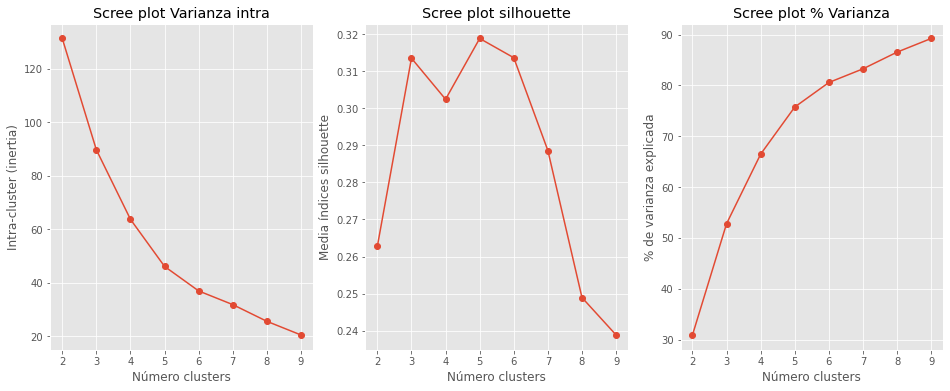

In [52]:
#Aplicamos la función a la matriz de puntos simulados en bruto X.
scree_plot_kmeans(X,10)
plt.show()


Según los dendogramas lo ideal serían 4 grupos pero si observamos estos gráficos, eligiríamos 5 grupos aunque la variabilidad de la varianza explicada continuaría siendo bastante baja y por lo que vimos en los dendogramas creemos que se adapta bastante bien el modelo con 4 cluster.

In [53]:
# Modelo
# ==============================================================================
X_scaled = scale(X)
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123) #elegimos 4 cluster como comentamos anteriormente
modelo_kmeans.fit(X=X_scaled)
print('Varianza intra: ' + str(modelo_kmeans.inertia_))

print('Centroides')
print(modelo_kmeans.cluster_centers_)

print('Etiquetas')
modelo_kmeans.labels_[:19]


Varianza intra: 63.65955788997811
Centroides
[[ 0.19847453  0.22076983 -0.20913923 -0.02956553  0.22406806 -0.13913203
   0.52072185  1.21882509 -0.66955704 -0.44101411]
 [-0.55055697 -0.5535243  -0.44968099  0.39027039  0.20317361 -0.35906856
  -0.41647281 -0.71407116  0.62524496 -0.06120003]
 [-0.41984856 -0.41965735  0.39734127 -1.57201468 -2.49210938  2.66501889
   0.23632544 -0.14788653  0.26329264  2.03321901]
 [ 2.67644707  2.63535428  2.37391175 -0.30542347  0.91607118 -0.52184602
   0.54423396  0.67117961 -1.71562485 -0.62468357]]
Etiquetas


array([1, 1, 1, 0, 0, 1, 1, 1, 2, 3, 0, 1, 1, 0, 3, 0, 1, 2, 1])

##### Métricas de evaluación

*Silueta clustering Ward*

In [54]:
# Clasificación con el modelo kmeans
# ==============================================================================
y_predict = modelo_kmeans.predict(X=X_scaled)

silhouette_score(X_scaled, y_predict)

0.3024104561509409

*Indice de Calinski-Harabasz clustering Ward*

In [56]:
from sklearn import metrics
metrics.calinski_harabasz_score(X_scaled, y_predict)


9.923132228500101

### Comparativa Ward-Kmeans

Si hacemos la comparación con Ward, observamos que el modelo K-means es mejor que el otro en cuanto a Silueta e Indice de Calinski pero tampoco podemos afirmar que sea un buen modelo.

Vamos a ver el detalle de las observaciones que has sido clasificadas en distintos grupos por los dos métodos utilizados. 

In [55]:
from numpy import random
import pandas as pd
modelo_kmeanslabels= pd.DataFrame(modelo_kmeans.labels_[:19])
modelo_kmeanslabels.rename(index={0:'Andalucía',1:'Aragón',2:'Asturias',3:'Baleares',4:'Canarias',5:'Cantabria',6:'CastillaLeón',7:'CastillaMancha',8:'Cataluña',9:'Ceuta',10:'ComValenciana',11:'Extremadura',12:'Galicia',13:'Madrid',14:'Melilla',15:'Murcia',16:'Navarra',17:'PaísVasco',18:'Rioja'}, inplace=True)

In [355]:
modelo_kmeanslabels

,0
Andalucía,1
Aragón,1
Asturias,1
Baleares,0
Canarias,0
Cantabria,1
CastillaLeón,1
CastillaMancha,1
Cataluña,2
Ceuta,3


In [57]:
CCAA_def = CCAA_pca.join(modelo_kmeanslabels[0])
CCAA_def

,PC1,PC2,PC3,cluster_labels,0
Andalucía,-0.941794,-0.615124,1.555342,0,1
Aragón,-1.228247,-1.044220,-0.952444,0,1
Asturias,-0.259449,-0.983908,2.249509,0,1
Baleares,1.749670,-0.128626,-0.828629,1,0
Canarias,0.912316,0.390499,0.322893,1,0
Cantabria,-0.689945,-1.441977,0.372566,0,1
CastillaLeón,-1.749074,-1.268669,-0.654973,0,1
CastillaMancha,-0.702274,-1.416667,-1.084032,0,1
Cataluña,-2.361646,5.064070,-0.953054,2,2
Ceuta,4.273890,0.852834,1.059451,3,3


In [58]:
CCAA_deff= CCAA_def.set_axis(['PC1', 'PC2', 'PC3', 'cluster_labels','kmeans_labels'], axis=1)
CCAA_deff

,PC1,PC2,PC3,cluster_labels,kmeans_labels
Andalucía,-0.941794,-0.615124,1.555342,0,1
Aragón,-1.228247,-1.044220,-0.952444,0,1
Asturias,-0.259449,-0.983908,2.249509,0,1
Baleares,1.749670,-0.128626,-0.828629,1,0
Canarias,0.912316,0.390499,0.322893,1,0
Cantabria,-0.689945,-1.441977,0.372566,0,1
CastillaLeón,-1.749074,-1.268669,-0.654973,0,1
CastillaMancha,-0.702274,-1.416667,-1.084032,0,1
Cataluña,-2.361646,5.064070,-0.953054,2,2
Ceuta,4.273890,0.852834,1.059451,3,3


In [59]:
#Calculamos las diferencias entre ambos
CCAA_deff[CCAA_deff.cluster_labels != CCAA_deff.kmeans_labels]


,PC1,PC2,PC3,cluster_labels,kmeans_labels
Andalucía,-0.941794,-0.615124,1.555342,0,1
Aragón,-1.228247,-1.044220,-0.952444,0,1
Asturias,-0.259449,-0.983908,2.249509,0,1
Baleares,1.749670,-0.128626,-0.828629,1,0
Canarias,0.912316,0.390499,0.322893,1,0
Cantabria,-0.689945,-1.441977,0.372566,0,1
CastillaLeón,-1.749074,-1.268669,-0.654973,0,1
CastillaMancha,-0.702274,-1.416667,-1.084032,0,1
Extremadura,-1.277358,-1.422263,1.722300,0,1
Galicia,-1.220324,0.775784,1.389449,0,1


In [60]:
#Establecemos correspondencias entre ambos cluster mediante matriz de confusión
pd.crosstab(CCAA_deff.cluster_labels,CCAA_deff.kmeans_labels)

kmeans_labels,0,1,2,3
cluster_labels,,,,
0,1,10,0,0
1,4,0,0,0
2,0,0,2,0
3,0,0,0,2


Los elementos en la diagonal principal (de la esquina superior izquierda a la esquina inferior derecha) representan las observaciones que fueron correctamente asignadas al mismo clúster por ambos métodos.
Los valores fuera de la diagonal principal indican las observaciones que fueron asignadas de manera diferente por los dos métodos.
Se puede observar que hay ciertas discrepancias entre los métodos. Por ejemplo, en la fila 0, todas las observaciones según `cluster_labels` se asignaron al clúster 1 según `kmeans_labels`. Del mismo modo, en la fila 1, todas las observaciones según `cluster_labels` se asignaron al clúster 0 según `kmeans_labels`.
